In [19]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from numpy.array_api import astype

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set()
# %matplotlib inline

In [21]:
#четем категориите на артикулите
wgi = pd.read_csv('data/wgi_descriptions.csv')

In [22]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27574 entries, 0 to 27573
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ARTICLE_ID       27574 non-null  int64 
 1   WGI              27574 non-null  int64 
 2   WGI_DESCRIPTION  27574 non-null  object
dtypes: int64(2), object(1)
memory usage: 646.4+ KB


In [23]:
#брой артикули
wgi['ARTICLE_ID'].unique().size

27574

In [24]:
#брой категории
wgi['WGI'].unique().size

1719

In [25]:
wgi['WGI_DESCRIPTION'].unique().size

1609

In [26]:
# четем данните за клиентите и техните поръчки
data = pd.read_csv('data/Sofia_University_Recommender_case_v2.csv')
data["date_time"] = pd.to_datetime(data["date_time"])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740259 entries, 0 to 3740258
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   bon_id          object        
 1   customer        object        
 2   article_id      int64         
 3   price           float64       
 4   qty             float64       
 5   unit            object        
 6   article_mother  float64       
 7   wgi             int64         
 8   date_time       datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 256.8+ MB


In [28]:
# брой покупки
data['bon_id'].unique().size

205428

In [29]:
# брой клиента
data['customer'].nunique()

16253

In [30]:
# информация за разпределението на брой бопнове за всеки клиент
data.groupby("customer")["bon_id"].nunique().sort_values().describe()

count    16253.000000
mean        12.639390
std         24.035284
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max        672.000000
Name: bon_id, dtype: float64

All customers: 16253


<Axes: ylabel='Frequency'>

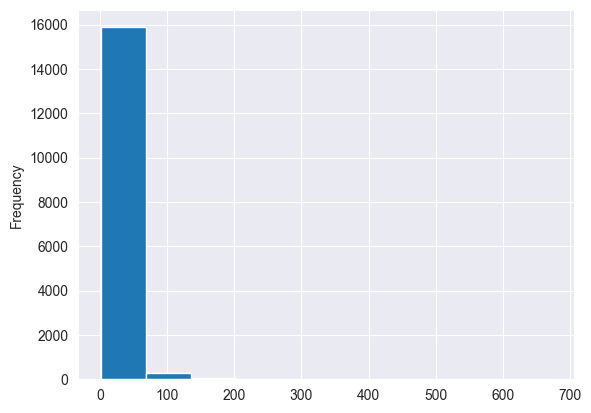

In [31]:
# визуално групиране на стотици у-брой клиенти х-брой бона
customer_orders = data.groupby("customer")["bon_id"].nunique()
print(f"All customers: {len(customer_orders)}")
customer_orders.plot.hist()



<Axes: ylabel='Frequency'>

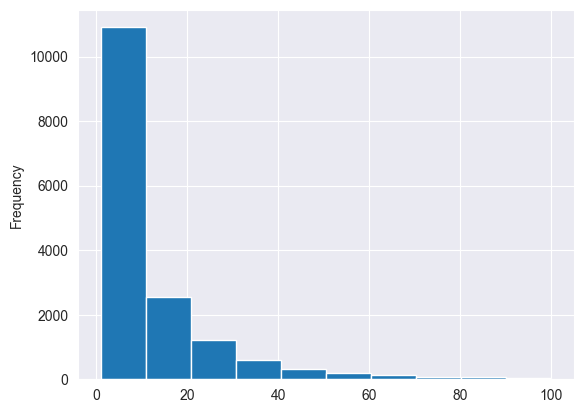

In [32]:
# същото но на десетици
customer_orders[customer_orders <= 100].plot.hist()

<Axes: ylabel='Frequency'>

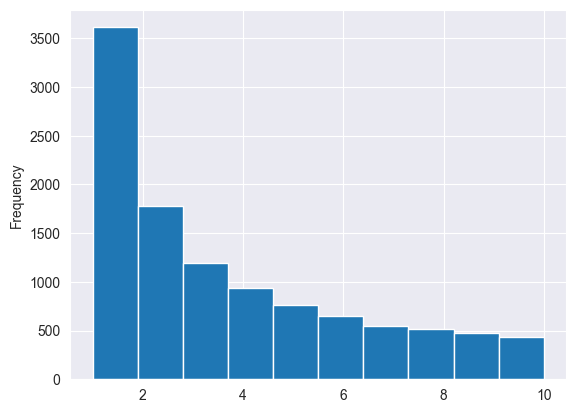

In [33]:
# и пак но от 1 до 10 поръчки
customer_orders[customer_orders <= 10].plot.hist()


In [34]:
# информация за разпределението на датите в данните
data["date_time"].describe()

count                          3740259
mean     2019-06-29 18:53:41.653306112
min                2019-02-01 07:54:58
25%                2019-04-24 11:46:23
50%                2019-06-30 12:32:01
75%                2019-09-04 19:06:24
max                2019-11-01 21:55:47
Name: date_time, dtype: object

In [35]:
# уникални артикули в данните съвпадат с тези от обяснителната таблица
data['article_id'].nunique()

27574

In [36]:
# информация за това колко често се купуват различните продукти на база всички данни има продукти които фигурират повече от веднъж в един и същи бон, тъй като са били купени 5 броя примерно, тогава този продукт присъства 5 пъти в бона, и в това броене се включват всичките 5 пъти (ако искаме може да се махнат и да се направят само уникални присъствия на артикул в бон
articles = data['article_id'].value_counts().to_frame()
articles["rank"] = range(len(articles))
data["art_rank"] = data["article_id"].map(articles["rank"])
articles


,count,rank
article_id,,
9700041,55105,0
96503,43730,1
3900911,40505,2
111951,26491,3
9700113,20664,4
...,...,...
81398,1,27569
26782,1,27570
56984,1,27571


In [37]:
# честота на срещане на категория същата логика като горе
cats = data["wgi"].value_counts().to_frame()
cats['rank'] = range(len(cats))
data["wgi_rank"] = data["wgi"].map(cats["rank"])
cats

,count,rank
wgi,,
823001,79077,0
439003,68105,1
163015,60494,2
161002,57576,3
161004,44463,4
...,...,...
756015,1,1714
571016,1,1715
571034,1,1716


In [38]:
# проверка за липсващи данни
data.isna().sum()

bon_id                  0
customer                0
article_id              0
price                   0
qty                     0
unit                    0
article_mother    2262151
wgi                     0
date_time               0
art_rank                0
wgi_rank                0
dtype: int64

In [39]:
# data['article_mother'] = data['article_mother'].astype('Int64')

In [40]:
# това е боря на артикулите които се повтарят в бон
data.duplicated().sum()

1104597

In [41]:
ids = data["customer"]
data[data.duplicated()].sort_values("bon_id")

,bon_id,customer,article_id,price,qty,unit,article_mother,wgi,date_time,art_rank,wgi_rank
2337426,+++EPjc6kjijZjjKAjyjvQ,14ec0df07d406dc32027,5103190,0.74,1.0,ST,NaN,628004,2019-05-17 14:36:31,151,29
2333327,+++EPjc6kjijZjjKAjyjvQ,14ec0df07d406dc32027,402044,5.49,1.0,ST,401882.0,286002,2019-05-17 14:36:31,14553,46
218430,+++EPjc6kjijZjjKAjyjvQ,14ec0df07d406dc32027,62603,6.59,1.0,ST,NaN,579002,2019-05-17 14:36:31,185,5
2331618,+++EPjc6kjijZjjKAjyjvQ,14ec0df07d406dc32027,5103183,2.65,1.0,ST,NaN,628004,2019-05-17 14:36:31,8,29
2331253,+++EPjc6kjijZjjKAjyjvQ,14ec0df07d406dc32027,5103190,0.74,1.0,ST,NaN,628004,2019-05-17 14:36:31,151,29
...,...,...,...,...,...,...,...,...,...,...,...
1414438,zzypztZAGxzt725eNDEKBw,6bc7d80e2b3cbae63f07,68631,0.59,1.0,ST,68631.0,655002,2019-09-23 16:45:04,738,31
1414439,zzypztZAGxzt725eNDEKBw,6bc7d80e2b3cbae63f07,68801,0.59,1.0,ST,68631.0,655002,2019-09-23 16:45:04,386,31
1557625,zzypztZAGxzt725eNDEKBw,6bc7d80e2b3cbae63f07,94754,1.69,1.0,ST,NaN,655002,2019-09-23 16:45:04,196,31
1416758,zzypztZAGxzt725eNDEKBw,6bc7d80e2b3cbae63f07,96503,0.79,1.0,ST,NaN,823001,2019-09-23 16:45:04,1,0


In [42]:
# we remove duplicates, because even though they are real purchases, we only need the unique values 
# for each article
# data.drop_duplicates(inplace=True)

In [43]:
data

,bon_id,customer,article_id,price,qty,unit,article_mother,wgi,date_time,art_rank,wgi_rank
0,/M+24Ty4omsvXxkYpDi5Mg,448da7e87cfe2351ea1c,70145,5.24,1.000,ST,NaN,257031,2019-02-25 20:29:02,6259,544
1,0bqzmS9FZKWKbuixrZt//Q,2d1a4bc8e19ac46e4896,3901219,1.10,1.000,ST,10559.0,431012,2019-02-25 13:31:21,1402,205
2,A5+2lZ5gskhsEFHAntHMKA,3e23aeed1f216b5969c2,30015,3.29,1.000,ST,NaN,238012,2019-02-25 10:16:48,76,131
3,RuoOGVsbqEqSsbNPbyltSg,b443a742d956cf281193,300894,7.00,0.826,KG,NaN,185003,2019-02-25 17:16:28,1157,8
4,fCVxkNOtQ75uGWrq8DJoLg,aefc75b928e7268f32a0,31728,1.19,1.000,ST,NaN,263008,2019-02-25 11:25:55,36,9
...,...,...,...,...,...,...,...,...,...,...,...
3740254,bMFmHBssU6JHKFhhGxFm+g,fa43e322f6c9e66783a8,47713,2.29,1.000,ST,NaN,486002,2019-02-19 08:48:14,3151,200
3740255,n+zxIayhG6D0P+DHbStvbQ,33a319e1a9578c07d775,94679,4.49,1.000,ST,NaN,786002,2019-02-19 12:34:32,13095,346
3740256,pK9Vy55a+M1eb1IKyeHfQg,ff0526c8de4802bd0581,92487,2.29,1.000,ST,92494.0,283002,2019-02-19 20:01:40,3424,186
3740257,v53QYn0d7A65IhJnxMwcJQ,6f76c9fa04faddfef67b,2802915,1.25,1.000,ST,2802914.0,654002,2019-02-19 12:04:39,324,72


In [44]:
# всеки кллиент и всички негови поръчки
customers_orders = data.groupby("customer")["bon_id"].unique()
customers_orders

customer
0005999f1ed76cced979    [j/O7LlV9NIPPmjQboxAvDQ, cgoqoZHHUXw2QLLDlwmd4...
0005c7a9975193b7c564    [RfWAW5r9du9/71DhZYlubQ, gCdkVlW3mr5KEOoj579od...
0019fd5330c95c449865    [xORsKpaWxfqJHhgWO/ajxA, SsyavSMBTGV02f8P1oE8l...
001f09dac5a5b3230fbd     [o865MwtBAHBAOtR4/L4Ttw, 6YDStsiaCFzFMc1uNbdd6g]
002015d8fb9808a36b0c    [TuFs1lzT/St1ZHirA/n4yA, CZnMMxKLPVjlxKGOgYR81...
                                              ...                        
ffe893c1ff627293a5bc    [LYwRiBWrYE3fzzqE9OoDHg, wzTHSguXHzzLzk42ckJT5...
ffeee0011d65bba4cbfc    [IShD5rrOXJSYwHPRBkUCug, uEu/MsYJvWUeBOQSAZSns...
fffbf45d19a58b35c437    [qtbJ6NpDflWXHL00+rcblw, Gaxe4V+KqmOKoOF08Zeh8...
fffd200990082490c679    [/lP2my891yiXIglRVsQW/w, rkOTFh9+n0IR0lY0r5fvn...
ffff92267be3b8af997e    [/Rphf1zR+GMipKzh9kt5yg, K3TgS92VQB0OU5IwpbzGi...
Name: bon_id, Length: 16253, dtype: object

In [45]:
# индексиране на продуктите с цел по-лесна обработка на данните в последстие, така работим с числа от 0 до 27475 и лесно ги слагаме в матрица като запазваме информацията, кой ред за кой артикул се отнася
def col_idx(col):
    return (
        pd.DataFrame(col.unique(), columns=["id"])
        .reset_index()
        .set_index("id")
        ["index"]
    )


article_idx = col_idx(data["article_id"])
article_idx

id
70145          0
3901219        1
30015          2
300894         3
31728          4
           ...  
94899      27569
91411      27570
78318      27571
94793      27572
62819      27573
Name: index, Length: 27574, dtype: int64

In [46]:
# добавянето на новата колона
data["article_idx"] = data["article_id"].map(article_idx)
data[["article_id", "article_idx"]]

,article_id,article_idx
0,70145,0
1,3901219,1
2,30015,2
3,300894,3
4,31728,4
...,...,...
3740254,47713,11089
3740255,94679,19864
3740256,92487,676
3740257,2802915,2607


In [47]:
# всеки бон и какви уникални артукли има в него
orders_articles = data.groupby("bon_id")["article_idx"].unique()
orders_articles

bon_id
+++9P79qqK7uw0t398RvNA                                           [821, 208]
+++EPjc6kjijZjjKAjyjvQ    [412, 5476, 1003, 222, 15, 1092, 81, 4567, 325...
+++jzyWDnK+rf5qvYvm9CA    [23, 24915, 1451, 9076, 2511, 735, 61, 48, 657...
++/T8+tP6AiRrEHvAX9bug    [3611, 2548, 15191, 4938, 2667, 2940, 7834, 88...
++25DgkCOMtjckZjxwx4tw    [225, 587, 2419, 2828, 4349, 679, 17504, 33, 9...
                                                ...                        
zzs7xav39TPsFKEfKNEMYQ    [518, 11683, 2661, 7402, 98, 8495, 986, 172, 1...
zztKo/357u2pk3rB7hKPIA     [2419, 68, 866, 420, 600, 15545, 1404, 33, 2242]
zzvwlje7UMILsPF5kadedg                         [78, 30, 428, 3030, 34, 293]
zzyMud9HroqsPe3xwUH9zg    [3347, 61, 7000, 2276, 370, 1646, 222, 1589, 1...
zzypztZAGxzt725eNDEKBw    [2359, 68, 2586, 3502, 2678, 61, 390, 735, 257...
Name: article_idx, Length: 205428, dtype: object

In [48]:
import numpy as np

# матрица на теглата на продуктите, колко често този продукт е купуван заедно за другия продукт
def M(N, sets):
    m = np.zeros((N, N), dtype=np.uint)
    for indexes in tqdm(sets):
        m[np.ix_(indexes, indexes)] += 1
    return m


article_M = M(len(article_idx), orders_articles)
print(article_M.shape)
#np.fill_diagonal(article_M,0)
#article_M[np.triu_indices(len(article_M), k=1)] = 0
article_M

100%|██████████| 205428/205428 [00:04<00:00, 42234.05it/s]

(27574, 27574)


array([[  59,    1,    2, ...,    0,    0,    0],
       [   1,  285,    6, ...,    0,    0,    0],
       [   2,    6, 2330, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    1,    0,    0],
       [   0,    0,    0, ...,    0,    2,    0],
       [   0,    0,    0, ...,    0,    0,    1]], dtype=uint32)

In [49]:
# това е диагонална матрица и всичко над диагонала е еднакво с това под него, може да се съкрати място
#np.fill_diagonal(article_M,0)
#article_M[np.triu_indices(len(article_M), k=1)] = 0
#article_M

In [50]:
# индексиране на категориите и добавяне на колоната в големите данни, след това се прави сет за всеки бон каква уникална категория има в него
cat_idx = col_idx(data["wgi"])
data["wgi_idx"] = data["wgi"].map(cat_idx)
orders_cats = data.groupby("bon_id")["wgi_idx"].unique()
orders_cats

bon_id
+++9P79qqK7uw0t398RvNA                                           [131, 153]
+++EPjc6kjijZjjKAjyjvQ    [196, 59, 382, 127, 15, 135, 68, 199, 411, 46,...
+++jzyWDnK+rf5qvYvm9CA     [22, 566, 205, 88, 162, 135, 55, 44, 41, 32, 91]
++/T8+tP6AiRrEHvAX9bug    [35, 82, 81, 417, 482, 738, 491, 262, 267, 523...
++25DgkCOMtjckZjxwx4tw           [164, 231, 234, 122, 198, 81, 32, 159, 35]
                                                ...                        
zzs7xav39TPsFKEfKNEMYQ    [300, 469, 162, 16, 81, 1109, 36, 131, 141, 24...
zztKo/357u2pk3rB7hKPIA             [234, 59, 183, 254, 16, 55, 20, 32, 197]
zzvwlje7UMILsPF5kadedg                                [66, 29, 5, 547, 200]
zzyMud9HroqsPe3xwUH9zg    [219, 55, 296, 167, 11, 268, 127, 536, 3, 353,...
zzypztZAGxzt725eNDEKBw    [12, 59, 49, 55, 135, 310, 5, 110, 138, 182, 3...
Name: wgi_idx, Length: 205428, dtype: object

In [51]:
# матрица на теглата на категориите, същата като тази за продуктите
cat_M = M(len(cat_idx), orders_cats)
print(cat_M.shape)
#np.fill_diagonal(cat_M,0)
#cat_M[np.triu_indices(len(cat_M), k=1)] = 0
cat_M

100%|██████████| 205428/205428 [00:03<00:00, 67656.67it/s]

(1719, 1719)


array([[ 498,   12,   30, ...,    0,    0,    0],
       [  12, 2595,   69, ...,    0,    0,    0],
       [  30,   69, 4174, ...,    1,    0,    0],
       ...,
       [   0,    0,    1, ...,    1,    0,    0],
       [   0,    0,    0, ...,    0,    1,    0],
       [   0,    0,    0, ...,    0,    0,    1]], dtype=uint32)

In [52]:
cust_idx = col_idx(data["customer"])
data["cust_idx"] = data["customer"].map(cust_idx)

In [53]:
# информация за всеки клиент и какви продукти си е купувал
customers_art_idx = data.groupby("customer")["article_idx"].unique()
customers_art_idx


customer
0005999f1ed76cced979    [1463, 3873, 8188, 7185, 2117, 72, 850, 865, 7...
0005c7a9975193b7c564    [14677, 41, 1255, 2973, 4868, 8318, 1408, 8691...
0019fd5330c95c449865    [758, 172, 33, 6062, 821, 854, 11084, 1796, 80...
001f09dac5a5b3230fbd    [1999, 1672, 2361, 2031, 3611, 9290, 1700, 150...
002015d8fb9808a36b0c    [3588, 265, 10039, 1176, 7704, 3562, 15817, 36...
                                              ...                        
ffe893c1ff627293a5bc    [1387, 1700, 8160, 2931, 1088, 15, 1711, 6135,...
ffeee0011d65bba4cbfc    [61, 3627, 604, 8785, 33, 2215, 821, 222, 2073...
fffbf45d19a58b35c437    [7033, 4174, 866, 56, 3541, 2486, 7318, 8742, ...
fffd200990082490c679    [4227, 5833, 1750, 1143, 306, 1868, 3427, 3361...
ffff92267be3b8af997e    [508, 1125, 1211, 1647, 2029, 2140, 358, 33, 1...
Name: article_idx, Length: 16253, dtype: object

In [54]:
data.groupby("customer")["bon_id"].nunique()

customer
0005999f1ed76cced979     6
0005c7a9975193b7c564    13
0019fd5330c95c449865     9
001f09dac5a5b3230fbd     2
002015d8fb9808a36b0c    12
                        ..
ffe893c1ff627293a5bc    11
ffeee0011d65bba4cbfc    21
fffbf45d19a58b35c437     5
fffd200990082490c679     4
ffff92267be3b8af997e    18
Name: bon_id, Length: 16253, dtype: int64

In [55]:
# разглеждане на един клиент и неговите поръчки
customer = data[data["customer"] == "5fb1cd5753be92d487bb"].sort_values("date_time")
customer

,bon_id,customer,article_id,price,qty,unit,article_mother,wgi,date_time,art_rank,wgi_rank,article_idx,wgi_idx,cust_idx
571226,CyJtreJTvFSKC/Eg9DSTsw,5fb1cd5753be92d487bb,73905,3.14,1.000,ST,73905.0,427007,2019-02-16 08:59:37,633,402,1284,217,210
585904,CyJtreJTvFSKC/Eg9DSTsw,5fb1cd5753be92d487bb,9700160,4.99,1.000,ST,NaN,163012,2019-02-16 08:59:37,526,50,1012,66,210
587019,CyJtreJTvFSKC/Eg9DSTsw,5fb1cd5753be92d487bb,100411,13.00,3.104,KG,100411.0,122002,2019-02-16 08:59:37,105,6,9826,95,210
585341,CyJtreJTvFSKC/Eg9DSTsw,5fb1cd5753be92d487bb,73905,3.14,1.000,ST,73905.0,427007,2019-02-16 08:59:37,633,402,1284,217,210
585330,CyJtreJTvFSKC/Eg9DSTsw,5fb1cd5753be92d487bb,73905,3.14,1.000,ST,73905.0,427007,2019-02-16 08:59:37,633,402,1284,217,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549446,EMHBKKwTfRN9Tkn4KXhpwg,5fb1cd5753be92d487bb,76542,3.69,1.000,ST,NaN,283002,2019-10-26 09:05:30,2442,186,5314,350,210
1551978,EMHBKKwTfRN9Tkn4KXhpwg,5fb1cd5753be92d487bb,76542,3.69,1.000,ST,NaN,283002,2019-10-26 09:05:30,2442,186,5314,350,210
1551215,EMHBKKwTfRN9Tkn4KXhpwg,5fb1cd5753be92d487bb,95492,1.39,1.000,ST,95492.0,431012,2019-10-26 09:05:30,9378,205,13970,1,210
2292689,EMHBKKwTfRN9Tkn4KXhpwg,5fb1cd5753be92d487bb,16371,13.99,1.000,ST,NaN,147008,2019-10-26 09:05:30,970,339,4083,524,210


In [56]:
customer.groupby("bon_id")["date_time"].unique().sort_values()

bon_id
CyJtreJTvFSKC/Eg9DSTsw    [2019-02-16 08:59:37]
njVSWCBr1Fx5/vfL0bJCjw    [2019-02-16 09:03:23]
C71zW9mmETwJRqTyVpD0XA    [2019-02-20 08:35:12]
LaX/eJirI8qibXoXxfL8cA    [2019-02-20 08:38:03]
M3ckjovOSwr/p7ycjnzsjA    [2019-02-20 08:38:41]
                                  ...          
O+TPCP54qB+suAfU28Waew    [2019-10-25 08:50:10]
t2RUdxtG2UWwXMIQfYE0LQ    [2019-10-25 08:51:00]
EEgdY7ZosJeMw96ugv35Kw    [2019-10-25 08:51:58]
JSUyiosIYGht4GnIOVfNXg    [2019-10-26 09:03:59]
EMHBKKwTfRN9Tkn4KXhpwg    [2019-10-26 09:05:30]
Name: date_time, Length: 672, dtype: object

In [57]:
customer_orders = (customer
.groupby("bon_id")
.agg({
    "article_id": "unique",
    "date_time": "unique",
})
)
customer_orders

,article_id,date_time
bon_id,,
+3CQcZ1M2jF191zvrpBhXQ,"[9700022, 600630, 502115, 96503, 9700116]",[2019-06-09 09:09:48]
+7/yF5NtW54hKBTt2tF5ng,"[88529, 96503, 9700113, 202892]",[2019-07-20 08:43:14]
+CD0IP/w92Mamzv/C9uTsQ,"[15692, 5003510, 53019, 52278, 70156, 87378]",[2019-10-11 07:53:49]
+RN2P82Xkem/e1fdlPwJkQ,"[3900911, 600630, 9700160, 16371, 88529, 97000...",[2019-06-18 08:55:01]
+U6UdMt2UjlhquqoI3Uu9Q,"[59909, 96503, 19845, 400026, 3200011, 88524, ...",[2019-02-26 08:47:41]
...,...,...
zkyCAc8uKw8tfgKdZ4Atgw,"[103894, 9700051, 600630, 88529, 9700170, 9701...",[2019-06-06 08:44:54]
zn/tFGVy/scRCbfRAVZ9CQ,"[96503, 9700120, 9700180, 9700113, 9700077]",[2019-07-09 10:20:34]
zqi6lLwI9XaAzuw420EJVg,"[73904, 50771, 13176, 16371, 400026, 83929, 96...",[2019-03-16 08:47:59]


In [58]:
article_M.shape

(27574, 27574)

In [59]:
rating_matrix = article_M

pulp_fiction_rating = rating_matrix["Pulp Fiction (1994)"]
pulp_corr = rating_matrix.corrwith(pulp_fiction_rating)
corr_df = pd.DataFrame(pulp_corr, columns=['Correlation'])
corr_df = corr_df.join(a_data['Rating_Count'])
similar_movies = corr_df[corr_df['Rating_Count'] > 500].sort_values(['Correlation'], ascending=False)
similar_movies

In [60]:
#cust_art_df = pd.DataFrame({'customer':customers_art_idx.index, 'articles':customers_art_idx.values})
df1 = pd.DataFrame(data=customers_art_idx.index, columns=['customer'])
df2 = pd.DataFrame(data=customers_art_idx.values, columns=['articles'])
cust_art_df = pd.merge(df1, df2, left_index=True, right_index=True)

In [61]:
#cust_art_df['customer']
cust_art_df['articles'][1]

array([14677,    41,  1255,  2973,  4868,  8318,  1408,  8691,  5518,
        4709,    98, 11603, 16041, 13798,  1932,  1134,    86, 11149,
         539, 15545,    61, 15004,   281, 15252,  1561,   257,  2438,
        7238, 11084,  8171, 13666,  6288,   265, 19022,  6472,  9705,
       15990,  2123,   139,  2630,  4057,  3405,   917,  1648,    33,
        1788,   331,   655,  5111,  5092,  1313,  8814,   622,  5257,
        3669, 10550,   615,  2021,   920,  4094, 10353,  1790,  2473,
        2025,  6045,  1703,  8355, 11021,  2878,   182,  2985,   373,
         833,  4077,   866,  2989,  2812,  8488, 17154,   712,   991,
        7714, 10502,  1299,  4631,    74,  8780,  1132,  7196,  2436,
        2468, 10336, 22683,  3465,  9334,  2808,  4180,  1619,   494,
        5294, 11939,  1351,  2322,  2592,   401, 23147,  3412,  6898,
         114, 11081,   857,   369,  5699,  7960,   314,   739, 10436,
         758,   193,  8772,   237,  1564,  8944,  7335, 11783,   158,
        6364,    81,

In [62]:
# създаване на матрица на присъствие на определен продукт в покупките на всеки клиент
all_articles = data['article_idx'].unique()
matrix = np.array([np.in1d(all_articles, x) for x in cust_art_df['articles']])
# from sklearn.feature_extraction.text import CountVectorizer
# 
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(cust_art_df['articles'].tolist())
# vectorizer.get_feature_names_out()
#client_orders_vectorized=

In [63]:
matrix = matrix.astype(int)
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
from sklearn.metrics.pairwise import cosine_similarity
# матрица на косинусово подобие
similarity_matrix = cosine_similarity(matrix)


In [65]:
print(similarity_matrix[1])

[0.0255655  1.         0.0885013  ... 0.04222003 0.04348283 0.02251887]


In [66]:
# последна поръчка на всеки клиент и анализ след това
customer_last_orders = (data
.sort_values("date_time")
.groupby(["customer","bon_id"])
["date_time"]
.first().reset_index()
.sort_values("date_time")
.groupby("customer")
.last()
# .iloc[-1:-2]
)

customer_last_orders.describe()

,date_time
count,16253
mean,2019-08-29 10:49:41.122254592
min,2019-02-02 12:17:20
25%,2019-07-23 18:00:54
50%,2019-10-02 13:24:42
75%,2019-10-25 09:52:32
max,2019-11-01 21:55:47


In [67]:
redy_data = data[~data["bon_id"].isin(customer_last_orders["bon_id"])]

customer_second_last_orders = (redy_data
.sort_values("date_time")
.groupby(["customer","bon_id"])
["date_time"]
.first().reset_index()
.sort_values("date_time")
.groupby("customer")
.last()
# .iloc[-1:-2]
)

customer_second_last_orders.describe()

,date_time
count,12640
mean,2019-08-22 08:52:22.049921024
min,2019-02-01 18:44:10
25%,2019-07-14 13:30:43.750000128
50%,2019-09-19 12:00:21
75%,2019-10-16 15:44:38.500000
max,2019-11-01 18:59:18


In [68]:
# взимане на последните две поръчки за да се направи валидация на предложението
customer_last_orders = pd.concat([customer_last_orders,customer_second_last_orders])

In [70]:
# селектиране на клиенти от втори тик: брой поръки от 3 до 80
customer_orders = data.groupby("customer")["bon_id"].nunique()
customers_type2 = customer_orders[(customer_orders >= 3) & (customer_orders <= 80)].index
display(customers_type2)

data_type2 = data[data["customer"].isin(customers_type2)]
test_type2 = data_type2[data["bon_id"].isin(customer_last_orders["bon_id"])]
display(test_type2)

data_type2 = data_type2[~data_type2.index.isin(test_type2.index)]
data_type2

Index(['0005999f1ed76cced979', '0005c7a9975193b7c564', '0019fd5330c95c449865',
       '002015d8fb9808a36b0c', '0021b8f3caff08e430d1', '002385b77b6fb2c4fb9b',
       '00252a8dad262d1554cb', '0028d1628ae5a178540b', '002c48d968f30119bf78',
       '002ee36670d6f549b3ed',
       ...
       'ff9e40bb9aeb88665215', 'ffbfec8cea84980c89eb', 'ffc156fee114d3e9b2b8',
       'ffc51740569a1324d7bd', 'ffe2e5832ed691b5aaa8', 'ffe893c1ff627293a5bc',
       'ffeee0011d65bba4cbfc', 'fffbf45d19a58b35c437', 'fffd200990082490c679',
       'ffff92267be3b8af997e'],
      dtype='object', name='customer', length=10582)

C:\Users\Boss\AppData\Local\Temp\ipykernel_21476\2801086923.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_type2 = data_type2[data["bon_id"].isin(customer_last_orders["bon_id"])]


,bon_id,customer,article_id,price,qty,unit,article_mother,wgi,date_time,art_rank,wgi_rank,article_idx,wgi_idx,cust_idx
65,00d+iyYvDwKkUaoZ8hyv6w,590c3b6658ffe933d9b6,2303792,12.25,1.00,ST,NaN,579006,2019-02-25 10:50:32,3421,15,65,57,57
98,qSx/XTmw1feGqA1se699Jg,7088ee18271512af58e9,27083,14.34,1.00,ST,27087.0,494004,2019-02-25 09:09:13,9288,587,96,79,79
169,cXpDPcyfTjg1P5tkrORWQA,8f81e10a8dcf7e34aa5a,13037,2.69,12.00,ST,13036.0,283006,2019-02-25 08:45:15,143,33,155,120,128
369,fS7NUhj9jF4Owbu6yZ9Eiw,e9bad5e6de983e16c85a,47710,0.49,5.00,ST,47709.0,465002,2019-02-25 14:46:02,4023,234,311,209,212
396,00d+iyYvDwKkUaoZ8hyv6w,590c3b6658ffe933d9b6,81689,1.79,1.00,ST,81688.0,772003,2019-02-25 10:50:32,675,123,329,22,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739064,3yKYEGWp/67qCCl3/zLlTA,cc09749ec10c0982b969,9700023,7.00,0.88,KG,NaN,163006,2019-02-19 13:07:44,93,113,114,93,5948
3739126,c2nmeI7bBdPM3C05nPqODA,445ccd3c20da966298af,2303792,12.25,1.00,ST,NaN,579006,2019-02-19 17:14:11,3421,15,65,57,901
3739152,c2nmeI7bBdPM3C05nPqODA,445ccd3c20da966298af,3600120,2.99,1.00,ST,3600120.0,477002,2019-02-19 17:14:11,110,28,138,98,901
3739428,3yKYEGWp/67qCCl3/zLlTA,cc09749ec10c0982b969,9700951,4.99,1.00,ST,NaN,163005,2019-02-19 13:07:44,12,12,172,131,5948


,bon_id,customer,article_id,price,qty,unit,article_mother,wgi,date_time,art_rank,wgi_rank,article_idx,wgi_idx,cust_idx
0,/M+24Ty4omsvXxkYpDi5Mg,448da7e87cfe2351ea1c,70145,5.24,1.000,ST,NaN,257031,2019-02-25 20:29:02,6259,544,0,0,0
1,0bqzmS9FZKWKbuixrZt//Q,2d1a4bc8e19ac46e4896,3901219,1.10,1.000,ST,10559.0,431012,2019-02-25 13:31:21,1402,205,1,1,1
3,RuoOGVsbqEqSsbNPbyltSg,b443a742d956cf281193,300894,7.00,0.826,KG,NaN,185003,2019-02-25 17:16:28,1157,8,3,3,3
5,lGWLVfWtSZOY59cthTzSbg,3ec06667f95ad1ab53cc,9700119,1.39,1.000,ST,NaN,163015,2019-02-25 11:06:09,61,2,5,5,5
6,lvpOc/KfUrXja2AJWgA3eA,05e554f0830b4216430c,3400285,6.19,1.000,ST,NaN,591002,2019-02-25 21:00:10,2279,341,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740253,b6081PG2ydd1Jy79cU2WPw,ef8d0547e583e48a5812,4001060,8.49,1.000,ST,4001060.0,445004,2019-02-19 10:25:58,5258,137,7759,318,1457
3740255,n+zxIayhG6D0P+DHbStvbQ,33a319e1a9578c07d775,94679,4.49,1.000,ST,NaN,786002,2019-02-19 12:34:32,13095,346,19864,385,54
3740256,pK9Vy55a+M1eb1IKyeHfQg,ff0526c8de4802bd0581,92487,2.29,1.000,ST,92494.0,283002,2019-02-19 20:01:40,3424,186,676,350,2018
3740257,v53QYn0d7A65IhJnxMwcJQ,6f76c9fa04faddfef67b,2802915,1.25,1.000,ST,2802914.0,654002,2019-02-19 12:04:39,324,72,2607,204,10579


In [71]:
# правене на проверки дали могат да останат в тази група, да имат поръчки 4 седмици назад от тези в тестовата група, ако нямат значи биват прехвърлени в първа група клиенти
customer_test_dt = test_type2.groupby("customer")["date_time"].first()
# customer_test_dt

customer_last_dt = data_type2.sort_values("date_time").groupby("customer")["date_time"].last()

last_orders = customer_last_dt.to_frame().join(customer_test_dt, lsuffix="_last", rsuffix="_test")
last_orders["diff"] = last_orders["date_time_test"] - last_orders["date_time_last"]
# last_orders

type1_customers = last_orders[last_orders["diff"] > pd.to_timedelta("4W")].index
customers_type2 = customers_type2[~customers_type2.isin(type1_customers)]
display(type1_customers)

data_mask = data_type2["customer"].isin(type1_customers)
data_type1, data_type2 = data_type2[data_mask], data_type2[~data_mask]
display(data_type1)

test_mask = test_type2["customer"].isin(type1_customers)
test_type1, test_type2 = test_type2[test_mask], test_type2[~test_mask]
display(test_type1)



Index(['0028d1628ae5a178540b', '003b44e9f3833c99d13d', '0064efb0e270b771f985',
       '008ff1d6c153ca84618e', '00b3702b82ccfe5f63f1', '00b4c56c99bb6aa95a80',
       '00bdc568eada907accaa', '00c1f332c04e71c803db', '00dffbadc7e08436a418',
       '010241623c3b6ef6744f',
       ...
       'ff64efc11aae41332fb8', 'ff6b558485142667cf88', 'ff86a9ad2619ac93838c',
       'ff893419875a6eb9bc2c', 'ff9277ecf7ae786e6b37', 'ffbfec8cea84980c89eb',
       'ffe2e5832ed691b5aaa8', 'ffeee0011d65bba4cbfc', 'fffbf45d19a58b35c437',
       'fffd200990082490c679'],
      dtype='object', name='customer', length=3541)

,bon_id,customer,article_id,price,qty,unit,article_mother,wgi,date_time,art_rank,wgi_rank,article_idx,wgi_idx,cust_idx
0,/M+24Ty4omsvXxkYpDi5Mg,448da7e87cfe2351ea1c,70145,5.24,1.0,ST,NaN,257031,2019-02-25 20:29:02,6259,544,0,0,0
6,lvpOc/KfUrXja2AJWgA3eA,05e554f0830b4216430c,3400285,6.19,1.0,ST,NaN,591002,2019-02-25 21:00:10,2279,341,6,6,6
9,+Ur9kF88d7dxNrZn3/8jdw,8fc01b53cc4833406fbb,3600091,0.95,1.0,ST,NaN,483004,2019-02-25 18:50:38,458,172,9,9,9
10,GGIpjRqaOxL0x9MmjlPDhA,e6ba27d239778aa9660e,63706,0.01,10.0,ST,63706.0,432010,2019-02-25 21:01:47,6872,194,10,10,10
41,VXCA4MfDNcw3apH+SlM6hg,7d407777f86736e35ac6,51441,1.79,1.0,ST,NaN,322002,2019-02-25 15:01:18,15,56,41,38,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740231,4YvWMqUkaVSSW/T1WoQvyw,056519e920bb4370b28e,2302020,0.99,1.0,ST,2301240.0,662002,2019-02-19 11:31:07,4206,73,5845,89,11389
3740238,cOOPdtASzi35XKgbDONoVA,b47558f28b420efa1cc9,62592,0.85,2.0,ST,NaN,283006,2019-02-19 20:46:08,2626,33,2722,120,8706
3740252,UXTxU1ZFD7tJ1tVf5QU+cg,853133c9fe2c05e02555,78254,4.99,1.0,ST,NaN,579002,2019-02-19 19:44:55,702,5,2076,196,1092
3740257,v53QYn0d7A65IhJnxMwcJQ,6f76c9fa04faddfef67b,2802915,1.25,1.0,ST,2802914.0,654002,2019-02-19 12:04:39,324,72,2607,204,10579


,bon_id,customer,article_id,price,qty,unit,article_mother,wgi,date_time,art_rank,wgi_rank,article_idx,wgi_idx,cust_idx
62513,kt8KefHw5sOHZwSLVweN1Q,d4b9c330a580b768af04,1400426,2.10,1.000,ST,NaN,404003,2019-03-24 11:46:24,115,10,133,16,2971
64398,kt8KefHw5sOHZwSLVweN1Q,d4b9c330a580b768af04,9700041,6.00,1.212,KG,9700041.0,161002,2019-03-24 11:46:24,0,3,33,32,2971
64867,kt8KefHw5sOHZwSLVweN1Q,d4b9c330a580b768af04,1400426,2.10,1.000,ST,NaN,404003,2019-03-24 11:46:24,115,10,133,16,2971
65447,kt8KefHw5sOHZwSLVweN1Q,d4b9c330a580b768af04,90302,7.00,1.040,KG,NaN,186014,2019-03-24 11:46:24,778,109,1482,127,2971
66386,kt8KefHw5sOHZwSLVweN1Q,d4b9c330a580b768af04,9700951,5.49,1.000,ST,NaN,163005,2019-03-24 11:46:24,12,12,172,131,2971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737727,3yKYEGWp/67qCCl3/zLlTA,cc09749ec10c0982b969,9700375,10.00,0.158,KG,NaN,163004,2019-02-19 13:07:44,222,30,1389,300,5948
3737845,3yKYEGWp/67qCCl3/zLlTA,cc09749ec10c0982b969,9700340,1.10,0.778,KG,NaN,163015,2019-02-19 13:07:44,1302,2,947,5,5948
3738718,3yKYEGWp/67qCCl3/zLlTA,cc09749ec10c0982b969,9700140,1.70,1.582,KG,NaN,163015,2019-02-19 13:07:44,77,2,712,5,5948
3739064,3yKYEGWp/67qCCl3/zLlTA,cc09749ec10c0982b969,9700023,7.00,0.880,KG,NaN,163006,2019-02-19 13:07:44,93,113,114,93,5948


In [76]:
#тестова група на артикули

def test_article(customer):
    _test = test_type2[test_type2["customer"] == customer]
    _data = data_type2[
        (data_type2["customer"] == customer)
        &
        ((_test["date_time"].iloc[0] - data_type2["date_time"]) <= pd.to_timedelta("4W"))
        ]
    _articles = _data.groupby("article_id").agg({"bon_id": "count", "art_rank": "first"}).sort_values(["bon_id", "art_rank"],ascending = [False, True])
    # display(_articles)
    choice = _articles.iloc[0]
    
    return any(_test["article_id"] == choice.name)
    
test_article(customers_type2[0])


True

In [79]:
# тесто група за категории
def test_wgi(customer):
    _test = test_type2[test_type2["customer"] == customer]
    _data = data_type2[
        (data_type2["customer"] == customer)
        &
        ((_test["date_time"].iloc[0] - data_type2["date_time"]) <= pd.to_timedelta("4W"))
        ]
    _cats = _data.groupby("wgi").agg({"bon_id": "count", "wgi_rank": "first"}).sort_values(["bon_id", "wgi_rank"],ascending = [False, True])
    # display(_articles)
    choice = _cats.iloc[0]
    
    return any(_test["wgi"] == choice.name)
    
test_wgi(customers_type2[0])

True

In [80]:
# процент на присъствие на избраната категория за намаление в следващите две поръчки, резултатите показват че 43% от клиентите са си купили продукт от предложената от нас категория
result = [test_wgi(customer) for customer in tqdm(
    customers_type2[:1000]
)]
sum(result) / len(result)


100%|██████████| 1000/1000 [02:25<00:00,  6.85it/s]


0.429

In [81]:
import pandas as pd
import numpy as np
# смятане на рейтинг за всички артикули от всички поръчки в целия дейтасет
ratings = np.zeros((len(cust_idx), len(article_idx)), dtype=np.uint16)
for _, entry in tqdm(data.iterrows(), total=len(data)):
    ratings[entry['cust_idx']][entry['article_idx']] +=1



100%|██████████| 3740259/3740259 [02:54<00:00, 21400.38it/s]


In [90]:
# това отново е за всички клиенти на база всички покупки, ще го имплементирам за клиенти от група 1 специфично
# Convert to Pandas DataFrame for better handling
# df_ratings = pd.DataFrame(ratings, columns=["Item A", "Item B", "Item C", "Item D"], index=["User 1", "User 2", "User 3"])

# Function to calculate cosine similarity between user ratings
def cosine_similarity(user1, user2):
  user1_ratings = ratings[user1]
  user2_ratings = ratings[user2]
  return np.dot(user1_ratings, user2_ratings) / (np.linalg.norm(user1_ratings) * np.linalg.norm(user2_ratings))

# Example usage: Find recommendations for user 0 based on similar users
target_user = 0

# Calculate cosine similarity between target user and all other users
similarities = {}
for user in tqdm(range(len(cust_idx))):
  if user != target_user:
    similarities[user] = cosine_similarity(target_user, user)

# Find the K most similar users (replace K with desired number)
k = 5  # Number of most similar users to consider
most_similar_users = sorted(similarities, key=similarities.get, reverse=True)[:k]

# Get recommendations based on similar users' ratings
recommendations = {}
for user in most_similar_users:
  for item, rating in enumerate(ratings[user]):
    if rating !=0 and ratings[target_user][item]==0:  # Check if target user hasn't rated the item
      recommendations[item] = rating if item not in recommendations else max(rating, recommendations[item])

# Print 5 recommendations for the target user
print(f"Recommendations for {target_user} based on {k} most similar users:")
for item in sorted(recommendations, key=recommendations.get, reverse=True)[:5]:
  print(f"Article {item}: (Rating {recommendations[item]:.2f})")


100%|██████████| 16253/16253 [00:09<00:00, 1716.81it/s]


Recommendations for 0 based on 5 most similar users:
Article 45: (Rating 12.00)
Article 944: (Rating 10.00)
Article 1905: (Rating 8.00)
Article 3792: (Rating 8.00)
Article 5087: (Rating 8.00)


In [95]:
data["article_id"].value_counts()

article_id
9700041    55105
96503      43730
3900911    40505
111951     26491
9700113    20664
           ...  
81398          1
26782          1
56984          1
95168          1
62819          1
Name: count, Length: 27574, dtype: int64

<Axes: >

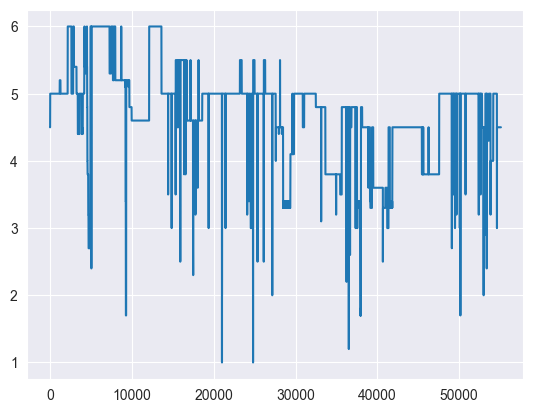

In [94]:
(data
 [data["article_id"] == 9700041]
.sort_values("date_time").reset_index()
 ["price"].plot()
 )

In [93]:
# показваме списъка с артикули които се повтарят в поръчките на най-близките по държание клиенти на избраният от нас клиент, тук ще го оправя че нещо не ме кефи
def find_count_diff_art(cust1,cust2):
    intersection = set(cust1) & set(cust2)
    intersection_list = list(intersection)
    return  intersection_list
    

for i in most_similar_users:
    print(find_count_diff_art(customers_art_idx[0],customers_art_idx[i]))

[769, 33, 3396, 5993, 8268, 1463, 1977, 538]
[33, 538, 2511]
[33, 232, 8715, 8268, 43, 273]
[]
[232, 33, 8715, 2511]


C:\Users\Boss\AppData\Local\Temp\ipykernel_21476\2589420346.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(find_count_diff_art(customers_art_idx[0],customers_art_idx[i]))
